Saving download (1).jpeg to download (1).jpeg
Loaded image: download (1).jpeg


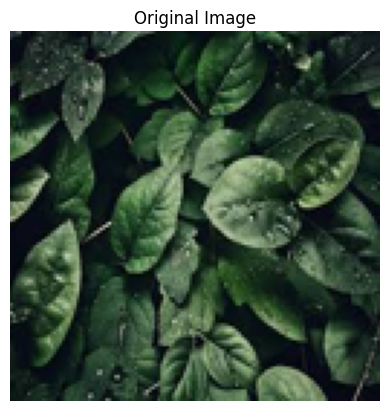

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 64, 64, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 128, 128, 3)    │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,651 (295.51 KB)

 Trainable params: 75,651 (295.51 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - loss: 0.5886
Epoch 2/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - loss: 0.5171
Epoch 3/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - loss: 0.4910
Epoch 4/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - loss: 0.4760
Epoch 5/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - loss: 0.4720
Epoch 6/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - loss: 0.4682
Epoch 7/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - loss: 0.4660
Epoch 8/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - loss: 0.4644
Epoch 9/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - loss: 0.4639
Epoch 10/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - loss: 0.4632
Epoch 11/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - loss: 0.4626
Epoch 12/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - loss: 0.4616
Epoch 13/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - loss: 0.4613
Epoch 14/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - loss: 0.4609
Epoch 15/40
13/13 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - loss: 0.4611
Epoch 16/40
13/13 ━

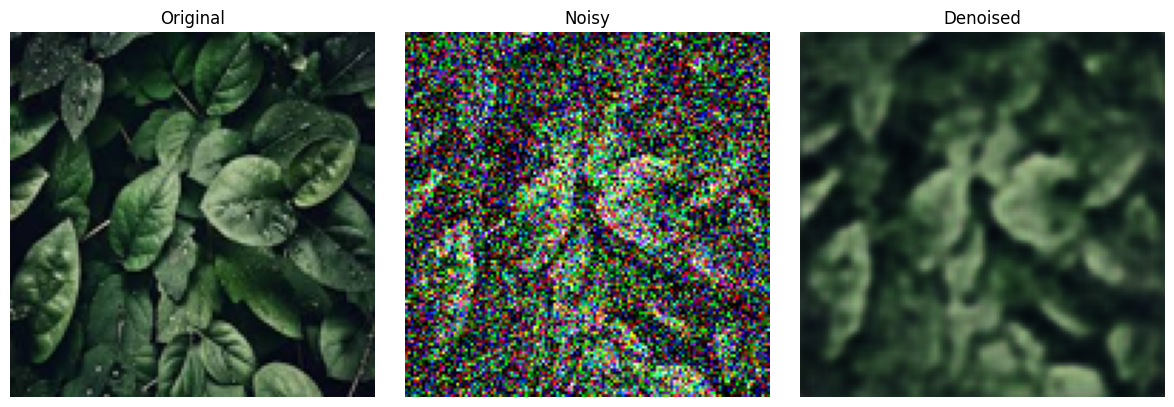

Denoised image saved as 'denoised_output.jpg'


In [8]:
# ===========================================================
# AUTOENCODER IMAGE DENOISING (SINGLE JPG UPLOAD)
# ===========================================================

from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ===========================================================
# 1. UPLOAD IMAGE FILE
# ===========================================================
uploaded = files.upload()  # Upload e.g. 'leaf.jpg'

# Get the first uploaded filename automatically
filename = list(uploaded.keys())[0]
print(f"Loaded image: {filename}")

# Load and preprocess the image
img = Image.open(filename).convert("RGB")
img = img.resize((128, 128))
img = np.array(img).astype('float32') / 255.0
x = np.expand_dims(img, axis=0)

# Show the uploaded image
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")
plt.show()

# ===========================================================
# 2. CREATE SYNTHETIC TRAINING DATA (AUGMENTED COPIES)
# ===========================================================
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.1,
    horizontal_flip=True
)

augmented_images = []
for batch in datagen.flow(x, batch_size=1):
    augmented_images.append(batch[0])
    if len(augmented_images) >= 200:  # Generate 200 augmented versions
        break

x_train = np.array(augmented_images)
x_test = np.array([img])

# Add Gaussian noise
noise_factor = 0.4
x_train_noisy = np.clip(x_train + noise_factor * np.random.normal(0, 1, x_train.shape), 0., 1.)
x_test_noisy = np.clip(x_test + noise_factor * np.random.normal(0, 1, x_test.shape), 0., 1.)

# ===========================================================
# 3. BUILD CONVOLUTIONAL AUTOENCODER
# ===========================================================
input_img = Input(shape=(128, 128, 3))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy')

autoencoder.summary()

# ===========================================================
# 4. TRAIN AUTOENCODER
# ===========================================================
autoencoder.fit(
    x_train_noisy, x_train,
    epochs=40,
    batch_size=16,
    shuffle=True,
    verbose=1
)

# ===========================================================
# 5. DENOISE AND DISPLAY RESULT
# ===========================================================
decoded_img = autoencoder.predict(x_test_noisy)[0]

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(x_test[0])
plt.title("Original")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(x_test_noisy[0])
plt.title("Noisy")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(decoded_img)
plt.title("Denoised")
plt.axis("off")

plt.tight_layout()
plt.show()

# ===========================================================
# 6. SAVE DENOISED IMAGE
# ===========================================================
denoised_image = (decoded_img * 255).astype('uint8')
cv2.imwrite("denoised_output.jpg", cv2.cvtColor(denoised_image, cv2.COLOR_RGB2BGR))
print("Denoised image saved as 'denoised_output.jpg'")
